# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [23]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [24]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [25]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

## Solution to JSON exercise
##### 1. I start by loading the json file int a pandas DataFrame. I can then perform a value_counts() on the countryname column  to count how many repetition there are for each unique value, convinietly it also sorts the outplut. The returned series is sorted thus the first 10 entries represnts the top 10 countries with most projects

In [5]:
json_df = pd.read_json('data/world_bank_projects.json')

In [6]:
# While unneccery, I convert the value_conts to a datafrma for a nicer table printout
count_counties = pd.DataFrame(json_df.countryname.value_counts())
count_counties.index.name = 'Country name'
count_counties.columns = ['Number of projects']

In [9]:
# Sanity check
assert (count_counties['Number of projects'].sum() == 500)

Printing the first 10 rows will give us 10 countries with most projects

In [10]:
count_counties.head(10)

,Number of projects
Country name,
Republic of Indonesia,19
People's Republic of China,19
Socialist Republic of Vietnam,17
Republic of India,16
Republic of Yemen,13
People's Republic of Bangladesh,12
Kingdom of Morocco,12
Nepal,12
Africa,11


For some reason Africa appears as a country name. So I'm going to check the url's of the entries with country name Africa to check if I can corect this

In [26]:
url = json_df[json_df.countryname == 'Africa'].url
pd.set_option('max_colwidth',200)
url

45                                                                            http://www.worldbank.org/projects/P125018/west-africa-disease-surveillance-response?lang=en
46                                                           http://www.worldbank.org/projects/P118213/rcip4-regional-communications-infrastructure-program-apl-4?lang=en
51                                               http://www.worldbank.org/projects/P130888/building-resilence-through-innovation-communication-knowledge-services?lang=en
58                                                                                                                      http://www.worldbank.org/projects/P144902?lang=en
65                                                      http://www.worldbank.org/projects/P075941/nelsap-regional-rusumo-falls-hydroelectric-multipurpose-project?lang=en
99                                                http://www.worldbank.org/projects/P145160/additional-financing-west-africa-agricultural-productivity

Seems like they are all regional projects which incorporate several countries in Africa
If we just want countries, I'll remove Africa from the list an reprint the top 10

In [28]:
count_counties.drop('Africa').head(10)

,Number of projects
Country name,
Republic of Indonesia,19
People's Republic of China,19
Socialist Republic of Vietnam,17
Republic of India,16
Republic of Yemen,13
People's Republic of Bangladesh,12
Kingdom of Morocco,12
Nepal,12
Republic of Mozambique,11


##### 3 . It's easier to answer question  3 . first, then use the updated table to generate the top projects 

In [30]:
# load json as string as shown above
json_file = json.load((open('data/world_bank_projects.json')))

In [31]:
# use normalization to create tables from nested element of mjtheme_namecode 
project_df = json_normalize(json_file , 'mjtheme_namecode')

In [32]:
project_df.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


Looks like the correct output.
Next I'll change the code column to category type (which porbably does not matter for this small dataset, but I guess will make the groupby faster for larger datasets)
I then rmove all lines with empty project names, hopefully there will be at least one project name for each of the project codes

In [33]:
project_df.code = project_df.code.astype('category')
project_names = project_df.loc[project_df['name'] != '',:]

Groping by codename and aggragating by the first occurance will give us a list with only unuiqe code - project name values. I then convert this dataframe to a dictionary for faster lookup

In [38]:
names_table = project_names.groupby('code').first()
# Making sure that indeed there is at least one project name for each of the project codes
assert(project_df.groupby('code').first().shape == names_table.shape )
names_dict = names_table.to_dict()['name']
names_dict

{'1': 'Economic management',
 '10': 'Rural development',
 '11': 'Environment and natural resources management',
 '2': 'Public sector governance',
 '3': 'Rule of law',
 '4': 'Financial and private sector development',
 '5': 'Trade and integration',
 '6': 'Social protection and risk management',
 '7': 'Social dev/gender/inclusion',
 '8': 'Human development',
 '9': 'Urban development'}

Seems like we got all of them. Creating the new name col and assgining it to the original dataframe

In [39]:
names_col = [names_dict[code] for code in project_df['code']]
project_df.loc[:,'name'] = names_col

Quick inspection of the head to check that everything look O.K

In [40]:
project_df.head()

,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


##### 2 . Now its easier to answer q2, as in q1, value_counts will count and sort unique values of project codes, I then print the first 10 entries to get  the top 10 major project themes

In [41]:
count_projects = pd.DataFrame(project_df.name.value_counts())
count_projects.index.name = 'Project theme'
count_projects.columns = ['Number of projects funded']
count_projects.head(10)

,Number of projects funded
Project theme,
Environment and natural resources management,250
Rural development,216
Human development,210
Public sector governance,199
Social protection and risk management,168
Financial and private sector development,146
Social dev/gender/inclusion,130
Trade and integration,77
Urban development,50


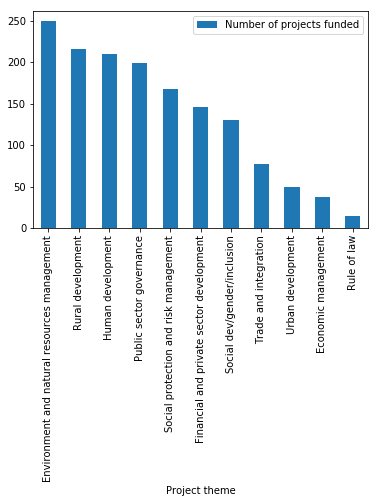

In [43]:
count_projects.plot(kind='bar')
plt.show()